In [1]:
import pandas as pd
import requests
import json
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

### Demographics data download from census.gov

In [2]:
api_token = '827add90f9f79abed8f3344cf60ee0ee09d6c7e6'

def cen_tract(tract_string):
    tract = tract_string/100
    return str(tract).rstrip('0').rstrip('.')

In [3]:
vars = "DP04_0017E,DP04_0018E,DP04_0019E,DP04_0020E,DP04_0021E,DP04_0022E,DP04_0023E,DP04_0024E,DP04_0025E,DP04_0026E"
labels0 = ['2014-2018','2010-2013','2000-2009','1990-1999','1980-1989','1970-1979','1960-1969',
           '1950-1959','1940-1949','1939']
#            'Occupied housing units','Vacant housing units',]
api_url_base = 'https://api.census.gov/data/2018/acs/acs5/profile/'
parameter = {"get":"DP04_0017E,DP04_0018E,DP04_0019E,DP04_0020E,DP04_0021E,DP04_0022E,DP04_0023E,DP04_0024E,DP04_0025E,DP04_0026E",
             "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
request = requests.get(api_url_base,parameter)
#print(request.text)
rhyme_json = request.json()
writeFile =open('file_name0.json', 'w')
#writeFile.write(rhyme_json)
with open('file_name0.json', 'w', encoding='utf-8') as f:
    json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
writeFile.close()

dfYearBuilt = pd.read_json('file_name0.json') #_, orient='split'
dfYearBuilt.iloc[0]
dfYearBuilt.columns = dfYearBuilt.iloc[0]
dfYearBuilt = dfYearBuilt.drop([0])
dfYearBuilt = dfYearBuilt.drop(columns = ['state','county'])
dfYearBuilt
dfYearBuilt.columns = ['2014-2018','2010-2013','2000-2009','1990-1999','1980-1989','1970-1979','1960-1969',
           '1950-1959','1940-1949','1939','tract']
dfYearBuilt = dfYearBuilt.astype('float')

def avg_age(df):
    w = df[:-1]
    y = [2016,2011,2006,1996,1986,1976,1966,1956,1946,1936]
    if w.sum()!=0:
        return round((y * w).sum() / (w.sum()))
    else:
        return sum(y)/len(y)
dfYearBuilt['YearBuilt'] = dfYearBuilt.apply(lambda x: avg_age(x),axis=1)

dfYearBuilt

,2014-2018,2010-2013,2000-2009,1990-1999,1980-1989,1970-1979,1960-1969,1950-1959,1940-1949,1939,tract,YearBuilt
1,87.0,236.0,303.0,92.0,78.0,143.0,472.0,234.0,268.0,2327.0,110200.0,1955.0
2,94.0,175.0,572.0,126.0,137.0,90.0,44.0,34.0,133.0,1144.0,20300.0,1968.0
3,0.0,39.0,27.0,73.0,38.0,28.0,70.0,9.0,138.0,1359.0,150400.0,1945.0
4,0.0,17.0,22.0,8.0,0.0,13.0,9.0,11.0,104.0,1310.0,10200.0,1940.0
5,113.0,37.0,34.0,34.0,132.0,121.0,79.0,41.0,82.0,212.0,60400.0,1972.0
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,66.0,122.0,60.0,64.0,302.0,191.0,92.0,1074.0,120202.0,1952.0
197,0.0,13.0,0.0,195.0,621.0,646.0,238.0,164.0,39.0,0.0,272004.0,1978.0
198,0.0,0.0,13.0,59.0,64.0,213.0,255.0,385.0,93.0,274.0,272005.0,1960.0
199,8.0,81.0,42.0,117.0,81.0,209.0,384.0,396.0,169.0,389.0,272006.0,1963.0


In [52]:
vars = "S0101_C01_001E,S0101_C01_032E"
labels = ['total_population', 'median_age']
api_url_base = 'https://api.census.gov/data/2018/acs/acs5/subject/'
parameter = {"get":"S0101_C01_001E,S0101_C01_032E",
#              DP04_0001E,DP04_0002E,DP04_0003E,DP04_0016E,DP04_0027E,DP04_0037E,DP04_0050E,DP04_0057E,DP04_0080E,DP04_0090E,DP04_0093E",
             "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
request = requests.get(api_url_base,parameter)
#print(request.text)
rhyme_json = request.json()
writeFile =open('file_name.json', 'w')
#writeFile.write(rhyme_json)
with open('file_name.json', 'w', encoding='utf-8') as f:
    json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
writeFile.close()

labels2 = ['%High School Graduate','Median Household Income',
           'Median rooms','no vehicle available',          
           'Total housing units']
#            'Occupied housing units','Vacant housing units',]
api_url_base = 'https://api.census.gov/data/2018/acs/acs5/profile/'
parameter = {"get":"DP02_0066E,DP03_0062E,DP04_0037E,DP04_0058E,DP04_0001E", #,DP04_0002E,DP04_0003E,
             "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
request = requests.get(api_url_base,parameter)
#print(request.text)
rhyme_json = request.json()
writeFile =open('file_name1.json', 'w')
#writeFile.write(rhyme_json)
with open('file_name1.json', 'w', encoding='utf-8') as f:
    json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
writeFile.close()

dfDem = pd.read_json('file_name.json') #_, orient='split'
dfDem.iloc[0]
dfDem.columns = dfDem.iloc[0]
dfDem = dfDem.drop([0])
dfDem = dfDem.drop(columns = ['state','county','tract'])
df2 = pd.read_json('file_name1.json')
df2.iloc[0]
df2.columns = df2.iloc[0]
df2 = df2.drop([0])
dfDem = pd.concat([dfDem, df2], axis=1).reindex(dfDem.index)
dfDem = pd.concat([dfDem,dfYearBuilt['YearBuilt']], axis=1).reindex(dfDem.index)

dfDem.columns =  ['total_population', 'median_age', 
                  'High School Graduate','Median Household Income',#                  
                  'Median rooms','no vehicle available',
                  'Total housing units', #'Occupied housing units','Vacant housing units',
                  'state','county','tract','Year Built']

dfDem.drop(columns=['state','county'])
dfDem['tract'] = dfDem['tract'].astype(str).astype(float)/100
# dfDem['tract'] = dfDem.apply(lambda x: cen_tract(x['tract']),axis=1)
dfDem.to_csv('Demographics.csv')

dfDem = dfDem.set_index('tract')
dfDem

,total_population,median_age,High School Graduate,Median Household Income,Median rooms,no vehicle available,Total housing units,state,county,Year Built
tract,,,,,,,,,,
1102.00,5706,32.4,4270,45406,3.1,1694,4240,24,510,1955.0
203.00,3877,35.5,3324,108516,4.2,266,2549,24,510,1968.0
1504.00,3983,32.9,1782,35479,5.5,556,1781,24,510,1945.0
102.00,2869,32.0,2275,107617,5.2,109,1494,24,510,1940.0
604.00,1376,37.0,1005,55368,4.0,248,885,24,510,1972.0
...,...,...,...,...,...,...,...,...,...,...
1202.02,5975,21.5,1797,36435,3.2,674,1971,24,510,1952.0
2720.04,3898,37.5,2579,42800,4.6,292,1916,24,510,1978.0
2720.05,3395,35.5,2010,59500,5.3,170,1356,24,510,1960.0


### Extracting Baltimore city from Maryland Tigerline Shape Files 

In [76]:
zipfile = "zip:///Users/Trisha/Desktop/Analysis911/tl_2019_24_tract.zip"
cities = gpd.read_file(zipfile)
#                        ") tl_2019_us_zcta510.zip
cities.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

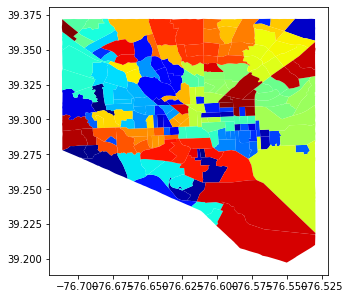

In [77]:
cities['COUNTYFP'] = cities['COUNTYFP'].astype(str).astype(int)
baltimore_counties = [510] #[163] #[87,93,99,125,147,163]
baltimore = gpd.GeoDataFrame()
for county in baltimore_counties:
    #print(county)
    temp = cities[cities['COUNTYFP']==county]
    #print(temp)
    baltimore = baltimore.append(temp)
    
baltimore.plot(cmap = 'jet',figsize=[5,5]) #,column = 'COUNTYFP'
# baltimore.NAME.unique()

baltimore = baltimore.drop(columns=['STATEFP','COUNTYFP','TRACTCE','GEOID','MTFCC','FUNCSTAT',
                        'AWATER'])
baltimore['NAME'] = baltimore['NAME'].astype(str).astype(float)

### Combining demographic and shapefiles at census tract level for Baltimore city

In [78]:
baltimore = baltimore.rename(columns={"NAME": "tract"})
baltimore = baltimore.set_index('tract')
for col in dfDem.columns:
    baltimore[col]=dfDem[col]
def pop_area(pop,area):
    norm_pop = int(float(pop)/((float(area))* 3.86102e-7))
    return norm_pop

baltimore['pop_sq_mile'] = baltimore.apply(lambda x: pop_area(x['total_population'],x['ALAND']),axis=1)
baltimore = baltimore.reset_index(drop=True)

In [84]:
# fig, ax = plt.subplots(figsize=(20, 5))
baltimore.to_file("baltimoe_data.shp")